<a href="https://colab.research.google.com/github/pavlyk/DataScience/blob/master/C1W4_Rayleigh_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Распределение Рэлея — это распределение случайной величины с использованием экспоненты \begin{eqnarray} e^{-kx2} \end{eqnarray} в функциях распределения.


 \begin{equation} D(X) = \frac{2 - \pi}{2}  \sigma^2 \end{equation} 

In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
%matplotlib inline

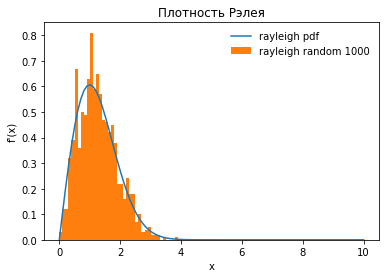

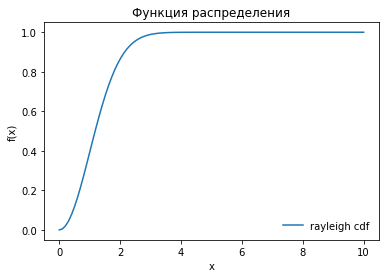

In [0]:
fig, ax = plt.subplots(1, 1)

sample = rayleigh.rvs(size = 1000)

x = np.linspace(0, 10, 100)
pdf = rayleigh.pdf(x)
ax.plot(x, pdf, label='rayleigh pdf')
# print(sample)
plt.hist(sample, bins=100, range=(0,10), density=True, label='rayleigh random 1000')
ax.legend(loc='best', frameon=False)
ax.set_title('Плотность Рэлея')
ax.set_xlabel('x')
ax.set_ylabel("f'(x)")
plt.show()

fig2, ax2 = plt.subplots(1, 1)
cdf = rayleigh.cdf(x)
ax2.plot(x, cdf, label='rayleigh cdf')
ax2.legend(loc='best', frameon=False)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Функция распределения')
plt.show()

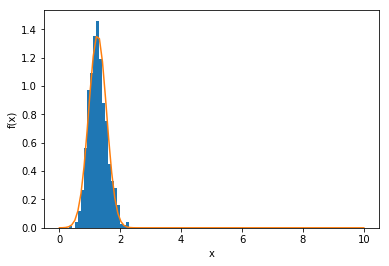

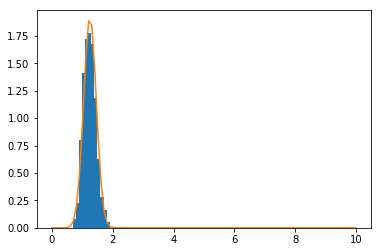

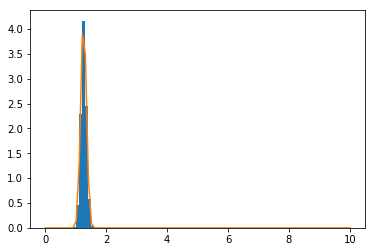

In [0]:
DX = 2 - math.pi/2 # Дисперсия 
EX = math.sqrt(math.pi/2) # Математическое ожидание

def findParam(n:int):
    arrayEX = []
    for i in range(1000):
        sample = rayleigh.rvs(size = n) # Генерируем случайную выборку длинной n
        arrayEX.append(sum(sample)/n) # Среднее EX
    
    # Формула Выборочное среднее Xn ~= нормальному распределению N (от Среднего ожидания EX, и сигмы DX/n)
    DXN = DX/n # DX для нормального распределения
    sigmaN = math.sqrt(DXN) # sigma для нормального распределения
    normN = sts.norm(EX, sigmaN) # нормальное распределение с расчетными характеристиками
    
    return arrayEX, normN


x = np.linspace(0, 10, 100)
arrayEX, normN = findParam(5)
plt.hist(arrayEX, bins=100, range=(0,10), density=True, label='rayleigh random 1000')
plt.plot(x, normN.pdf(x), label='PDF при n = 5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

arrayEX, normN = findParam(10)
plt.hist(arrayEX, bins=100, range=(0,10), density=True, label='rayleigh random 1000')
plt.plot(x, normN.pdf(x), label='PDF при n = 10')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


arrayEX, normN = findParam(50)
plt.hist(arrayEX, bins=100, range=(0,10), density=True, label='rayleigh random 1000')
plt.plot(x, normN.pdf(x), label='PDF при n = 50')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Вывод
Для выполнения задания была выбрана функция распределения Рэлея из списка доступных в SciPy. Были выполнены условия задачи: построены для четырех разных n (5, 10, 50) по 1000 случайных выборок, измерены их выборочные средние и составлены соостветствующие массивы, по массивам выборочных средних построены гистограммы распределения, исходя из теоретических данных определены соответствующие каждому n параметры распределений EX , sigmaN для апроксимации, по полученным параметрам построены функции нормального распределения для каждого n поверх соответствующих гистограмм.

По полученным графикам наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой распределением Рэлея.